In [8]:
import pandas as pd
import matplotlib.pyplot as plt 

In [9]:
import json
tweet_files = ['C:/Users/saragada/Desktop/GITHUB/GetOldTweets-python-master/twitter_search-master/twitter_search-master/#makedonalddrumpfagain/#makedonalddrumpfagain_2017-06-11.json','C:/Users/saragada/Desktop/GITHUB/GetOldTweets-python-master/twitter_search-master/twitter_search-master/HewlettPackard/HewlettPackard_2017-06-08.json']
tweets = []
for file in tweet_files:
    with open(file, 'r') as f:
        for line in f.readlines():
            tweets.append(json.loads(line))

In [10]:
def populate_tweet_df(tweets):
    df = pd.DataFrame()
 
    df['text'] = list(map(lambda tweet: tweet['text'], tweets))
 
    df['location'] = list(map(lambda tweet: tweet['user']['location'], tweets))
 
    df['country_code'] = list(map(lambda tweet: tweet['place']['country_code']
                                  if tweet['place'] != None else '', tweets))
 
    df['long'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][0]
                        if tweet['coordinates'] != None else 'NaN', tweets))
 
    df['latt'] = list(map(lambda tweet: tweet['coordinates']['coordinates'][1]
                        if tweet['coordinates'] != None else 'NaN', tweets))
 
    return df

In [11]:
df=populate_tweet_df(tweets)

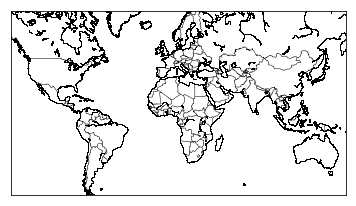

In [12]:
from mpl_toolkits.basemap import Basemap
 
# plot the blank world map
my_map = Basemap(projection='merc', lat_0=50, lon_0=-100,
                     resolution = 'l', area_thresh = 5000.0,
                     llcrnrlon=-140, llcrnrlat=-55,
                     urcrnrlon=160, urcrnrlat=70)
# set resolution='h' for high quality
 
# draw elements onto the world map
my_map.drawcountries()
#my_map.drawstates()
my_map.drawcoastlines(antialiased=False,
                      linewidth=0.005)
 
# add coordinates as red dots
longs = list(df.loc[(df.long != 'NaN')].long)
latts = list(df.loc[df.latt != 'NaN'].latt)
x, y = my_map(longs, latts)
my_map.plot(x, y, 'ro', markersize=6, alpha=0.5)
 
plt.show()

In [13]:
import wordcloud

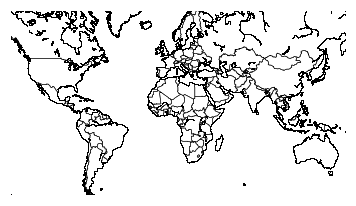

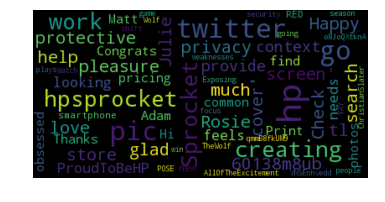

In [7]:
from os import path
from wordcloud import WordCloud

#d = path.dirname(__file__)

# Read the whole text.
text = open(path.join('C:/Users/saragada/Desktop/GITHUB/GetOldTweets-python-master/GetOldTweets-python-master/Dtweets.csv')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()